In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
from datetime import datetime, timedelta
%matplotlib inline
import os
import csv
import requests
import time
import io
import yfinance as yf
import warnings
import matplotlib.pyplot as plt


In [3]:
tsla_features = pd.read_csv('TSLA_results.csv')
tsla_features

,Unnamed: 0,Call Volume,Put Volume,Total Volume,Percent of cPut,Put signals,Percent of calls,Call signals,Option rVol,option rvol delta,...,bollinger_signal,rvol,rvol SD,rvol signal,daily returns,volume delta,bb std delta,rvol delta,Option rVol SD,Option rVol signal
0,2016-02-26,61082.0,55707.0,116789.0,0.476988,False,0.523012,False,1.265347,0.009447,...,0.0,0.918543,1.476481,0.0,0.015526,0.000000,0.000000,0.000000,NaN,0.0
1,2016-02-29,38760.0,33531.0,72291.0,0.463834,False,0.536166,False,0.765316,-0.395173,...,0.0,0.672970,1.475945,0.0,0.008353,-0.258215,-0.612534,-0.267351,NaN,0.0
2,2016-03-01,46761.0,66906.0,113667.0,0.588614,False,0.411386,False,1.126356,0.471753,...,1.0,0.993514,1.464062,0.0,-0.029073,0.491932,0.259721,0.476312,0.945510,0.0
3,2016-03-02,36792.0,43244.0,80036.0,0.540307,False,0.459693,False,0.902682,-0.198582,...,0.0,0.724600,1.435430,0.0,0.010679,-0.275588,-0.016266,-0.270669,0.883082,0.0
4,2016-03-03,51158.0,52002.0,103160.0,0.504091,False,0.495909,False,1.042501,0.154893,...,-1.0,0.736651,1.375740,0.0,0.039291,-0.006869,0.749635,0.016632,0.894204,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,2020-01-24,297731.0,265006.0,562737.0,0.470923,False,0.529077,False,0.770595,-0.027754,...,1.0,0.791383,1.555173,0.0,-0.012898,-0.269574,-0.727745,-0.282258,1.484651,0.0
971,2020-01-27,179882.0,130124.0,310006.0,0.419747,False,0.580253,False,0.633703,-0.177645,...,0.0,0.744179,1.542626,0.0,-0.012039,-0.051938,0.896518,-0.059648,0.976759,0.0
972,2020-01-28,137593.0,110051.0,247644.0,0.444392,False,0.555608,False,0.663103,0.046394,...,0.0,0.641439,1.531559,0.0,0.015913,-0.133714,-0.345125,-0.138058,0.764001,0.0
973,2020-01-29,281369.0,246957.0,528326.0,0.467433,False,0.532567,False,1.459496,1.201010,...,-1.0,0.955069,1.518071,0.0,0.024854,0.510073,1.494002,0.488948,0.860175,0.0


In [4]:
start = '2016-01-01'
end = '2020-01-31'
Symbols=['TSLA']

In [5]:

big_df = pd.read_csv('try_this.csv')
big_df=big_df.drop(big_df.columns[0], axis=1)
big_df = big_df.sort_values(by = 'DataDate')
big_df = big_df.set_index(pd.to_datetime(big_df.DataDate, infer_datetime_format=True))
big_df

,optionkey,Symbol,ExpirationDate,AskPrice,AskSize,BidPrice,BidSize,LastPrice,PutCall,StrikePrice,Volume,openinterest,UnderlyingPrice,DataDate,time delta
DataDate,,,,,,,,,,,,,,,
2016-01-04,AAPL2016-01-15p94.002016-01-04,AAPL,2016-01-15,0.24,237,0.21,363,0.32,put,94.0,397,356,105.34,2016-01-04,11 days
2016-01-04,TSLA2016-01-22c160.002016-01-04,TSLA,2016-01-22,65.40,6,61.80,7,0.00,call,160.0,0,0,223.42,2016-01-04,18 days
2016-01-04,TSLA2016-01-22p160.002016-01-04,TSLA,2016-01-22,0.34,5,0.09,6,0.09,put,160.0,0,4,223.42,2016-01-04,18 days
2016-01-04,TSLA2016-01-22c165.002016-01-04,TSLA,2016-01-22,60.35,10,56.95,10,0.00,call,165.0,0,0,223.42,2016-01-04,18 days
2016-01-04,TSLA2016-01-22p165.002016-01-04,TSLA,2016-01-22,0.38,102,0.13,96,0.26,put,165.0,0,6,223.42,2016-01-04,18 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-31,TSLA2020-10-16P640.002020-01-31,TSLA,2020-10-16,102.25,1,99.10,12,105.50,put,640.0,1,5,650.57,2020-01-31,259 days
2020-01-31,TSLA2020-10-16P645.002020-01-31,TSLA,2020-10-16,105.20,4,102.30,12,107.00,put,645.0,1,3,650.57,2020-01-31,259 days
2020-01-31,TSLA2020-10-16P650.002020-01-31,TSLA,2020-10-16,107.70,1,104.45,11,107.80,put,650.0,8,9,650.57,2020-01-31,259 days


In [6]:
####Get the underlying stock prices and volume by date

def get_underlying(Symbols):
# create empty dataframe
    stock_final = pd.DataFrame()
# iterate over each symbol
    for i in Symbols:  


        try:
            # download the stock price 
            stock = []
            stock = yf.download(i,start=start, end=end, progress=False)

            # append the individual stock prices 
            if len(stock) == 0:
                None
            else:
                stock['Name']=i
                stock_final = stock_final.append(stock,sort=False)
                stock_final= stock_final.drop(['Open', 'High', 'Low', 'Adj Close'], axis=1)
        except Exception:
            None
    return stock_final

stock_final = get_underlying(Symbols)

In [16]:
#stock_final.to_csv('TSLA_underlying.csv')

In [8]:
### To slice the dataframe for a particular symbol or option type

def select_df(df, symbol, option):
    df = df.loc[df['PutCall'] == option]
    df = df.loc[df['Symbol'] == symbol]
    return df


###The first process, for the first features needed for the program

def feature_engineering(data):
    #for i in data:
    #data['ExpirationDate'] = data['ExpirationDate'].apply(pd.Timestamp)
    #data['DataDate'] = data['DataDate'].apply(pd.Timestamp)
    #data = data.loc[data['PutCall'] == 'put']

    data['ExpirationDate'] =  pd.to_datetime(data['ExpirationDate'], infer_datetime_format=True)
    #data['DataDate'] =  pd.to_datetime(data['DataDate'], infer_datetime_format=True)
    data['time delta'] = data['ExpirationDate'] - data['DataDate']
    data['StrikePrice'] = pd.to_numeric(data['StrikePrice'])
    data['UnderlyingPrice'] = pd.to_numeric(data['UnderlyingPrice'])
    data['% out'] = data['StrikePrice'] / data['UnderlyingPrice'] - 1
    data['exp?'] = data['ExpirationDate'] == data['DataDate']
    #data['ExpirationDate']= data['ExpirationDate'].to_string
    #data['DataDate'] = data['DataDate'].to_string
    data['DateKey'] = data["DataDate"].astype(str) + data["ExpirationDate"].astype(str) 

    #data['xp'] = data.loc[data['exp?'] == True, 'AskPrice']
    #data['xp']=data.OptionKey.map(xp.set_index('OptionKey')['xp'])

    return data



###To map the expiration value by optionkey, so it will appear on all 
###df.loc[df'AskPrice'] > df['xp']
def map_exp(df):
    xp = df
    xp.loc[xp['exp?']== True, 'xp' ] = xp.loc[df['exp?'] == True, 'AskPrice']
    xp = xp.loc[xp['exp?']== True]
    xp= xp[['optionkey', 'xp']]
    df['xp']=df.optionkey.map(xp.set_index('optionkey')['xp'])
    return df

###Pass the data frame with features in to this

def get_option_volume(option_df, symbol):
    #Calculate volume by date
    mf=option_df[option_df['Symbol']==symbol]
    mf['Volume'] = mf['Volume'].astype(int)
    mf['Total Volume'] = mf.groupby(['DataDate']).Volume.transform('sum')
    mf['Call Volume'] = mf.loc[mf['PutCall'] == 'call', 'Volume']
    mf['Put Volume'] = mf.loc[mf['PutCall'] == 'put', 'Volume']
    volume = mf.groupby('DataDate').agg({'Call Volume': 'sum', 'Put Volume' : 'sum'})
    volume['Total Volume'] = volume.loc[:,['Call Volume','Put Volume']].sum(axis=1)

    #Create put signals
    volume['Percent of Put'] = volume['Put Volume']/volume['Total Volume']
    volume['Put signals'] = volume['Percent of Put'] > .6

    #Create Call volume
    volume['Percent of calls'] = volume['Call Volume']/volume['Total Volume']
    volume['Call signals'] = volume['Percent of calls'] > .6
    volume_ratio = 3 #20
    volume['Option rVol'] = volume['Total Volume']/ volume['Total Volume'].rolling(window = volume_ratio).mean()
    

    volume['option rvol delta'] = volume['Option rVol'].dropna().pct_change()

    return volume


###Create the signals that will be passed to LSTM
###This result is supposed to work in LSTM, however it isnt right now


def get_signals(features):
    signals_df = pd.DataFrame()
    signals_df['volume delta'] = features['Volume'].dropna().pct_change()
    signals_df['bb std delta'] = features['bollinger_std'].dropna().pct_change()
    signals_df['rvol delta'] = features['rvol'].dropna().pct_change()
    signals_df['option rvol delta'] = features['Option rVol'].dropna().pct_change()
    signals_df['daily returns'] = features['daily returns'].dropna()

    return signals_df


### Pass the stock underlying dataframe in this


def get_underlying_volume(uf, symbol):

    bollinger_window= 3 #20
    
    volume_df=uf[uf['Name']==symbol]
    #volume_df = volume_df.merge(volume, left_index=True, right_index = True)

     # more steps feature engineering
    volume_df.loc[:, 'bollinger_mid_band'] = volume_df['Close'].rolling(window=bollinger_window).mean()
    volume_df.loc[:, 'bollinger_std'] = volume_df['Close'].rolling(window=bollinger_window).std()
    
     #Calculate upper and lowers bands of bollinger band
     
    volume_df['bollinger_upper_band']  = volume_df['bollinger_mid_band'] + (volume_df['bollinger_std'] * 1)
    volume_df['bollinger_lower_band']  = volume_df['bollinger_mid_band'] - (volume_df['bollinger_std'] * 1)

     #Calculate bollinger band trading signal
    volume_df['bollinger_long'] = np.where(volume_df['Close'] < volume_df['bollinger_lower_band'], 1.0, 0.0)
    volume_df['bollinger_short'] = np.where(volume_df['Close'] > volume_df['bollinger_upper_band'], -1.0, 0.0)
    volume_df['bollinger_signal'] = volume_df['bollinger_long'] + volume_df['bollinger_short']
     #construct relative volume ratio and append to volume
    volume_ratio = 20

     #calculate rvol and 1 deviation of a 20 day rvol
    volume_df['rvol'] = volume_df['Volume']/ volume_df['Volume'].rolling(window = volume_ratio).mean()
    volume_df['rvol SD'] = volume_df['rvol'].rolling(window = volume_ratio).std()/2+ volume_df['rvol'].rolling(window = volume_ratio).mean()
#     #create rvol signal where rvol > 1 SD rvol
    volume_df['rvol signal'] = np.where(volume_df['rvol'] > volume_df['rvol SD'], 1.0, 0.0)

     #create options rVol signal
    volume_ratio = 20

    #volume_df['Option rVol'] = volume_df['Total Volume']/ volume_df['Total Volume'].rolling(window = volume_ratio).mean()
    #volume_df['Option rVol SD'] = volume_df['rvol'].rolling(window = volume_ratio).std()/2+ volume_df['rvol'].rolling(window = volume_ratio).mean()
     #create rvol signal where rvol > 1 SD rvol
    #volume_df['Option rVol signal'] = np.where(volume_df['rvol'] > volume_df['rvol SD'], 1.0, 0.0)

     #create daily returns column and Actual Value column
    volume_df['daily returns'] = volume_df['Close'].dropna().pct_change()

     #drop nans due to BB/rvol calculations
    volume_df = volume_df.dropna()
   # return volume_df
    
    trading_signals = volume_df
    trading_signals['volume delta'] = volume_df['Volume'].dropna().pct_change()
    trading_signals['bb std delta'] = volume_df['bollinger_std'].dropna().pct_change()
    trading_signals['rvol delta'] = volume_df['rvol'].dropna().pct_change()
#     #add daily returns as target
    trading_signals['daily returns'] = volume_df['daily returns'].dropna()

    trading_signals= trading_signals.fillna(value = 0)
    trading_signals= trading_signals.replace([np.inf, -np.inf], 0.0)
    
    trading_signals.head()
    return trading_signals

###Merge the option and underlying volume dfs, and create extra signals

def merge(uv,ov):
    combined = uv.merge(ov, left_index = True, right_index = True, how = 'inner')
    volume_ratio = 3 #20
    combined['Option rVol SD'] = combined['rvol'].rolling(window = volume_ratio).std()/2+ combined['rvol'].rolling(window = volume_ratio).mean()

    combined['rvol signal'] = np.where(combined['rvol'] > combined['rvol SD'], 1.0, 0.0)

    combined['Option rVol signal'] = np.where(combined['rvol'] > combined['rvol SD'], 1.0, 0.0)
    return combined

#trading_signals = merge(underlying_volume, option_volume)


#use the pipeline to get the features dataframe
#ov= option volume dataframe
#uv=underlying volume dataframe
#run this cell after running the functions below

# mf={}
# def pipeline_features(ov, uv):
#     for each_symbol in stock_final['Name'].unique():
#         ov = feature_engineering(ov)
#         opt = get_option_volume(ov, each_symbol)
#         undv = get_underlying_volume(uv, each_symbol)
#         combined = merge(opt, undv)
#         mf[each_symbol]=combined
#         #save each of the features dataframes to csv
#         #combined.to_csv(f'{each_symbol}_initial.csv')
#     return mf

# features = pipeline_features(df, stock_final)
# features.keys()
# tsla_features = features['TSLA']

In [9]:
tsla_puts = select_df(big_df, 'TSLA', 'put')
df = tsla_puts
df

,optionkey,Symbol,ExpirationDate,AskPrice,AskSize,BidPrice,BidSize,LastPrice,PutCall,StrikePrice,Volume,openinterest,UnderlyingPrice,DataDate,time delta
DataDate,,,,,,,,,,,,,,,
2016-01-04,TSLA2016-01-22p160.002016-01-04,TSLA,2016-01-22,0.34,5,0.09,6,0.09,put,160.0,0,4,223.42,2016-01-04,18 days
2016-01-04,TSLA2016-01-22p165.002016-01-04,TSLA,2016-01-22,0.38,102,0.13,96,0.26,put,165.0,0,6,223.42,2016-01-04,18 days
2016-01-04,TSLA2016-01-22p170.002016-01-04,TSLA,2016-01-22,0.45,94,0.18,103,0.31,put,170.0,1,37,223.42,2016-01-04,18 days
2016-01-04,TSLA2016-01-22p175.002016-01-04,TSLA,2016-01-22,0.37,27,0.27,23,0.40,put,175.0,20,12,223.42,2016-01-04,18 days
2016-01-04,TSLA2016-01-22p180.002016-01-04,TSLA,2016-01-22,0.51,51,0.35,127,0.45,put,180.0,14,67,223.42,2016-01-04,18 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-31,TSLA2020-10-16P635.002020-01-31,TSLA,2020-10-16,99.60,13,97.05,12,100.00,put,635.0,0,20,650.57,2020-01-31,259 days
2020-01-31,TSLA2020-10-16P640.002020-01-31,TSLA,2020-10-16,102.25,1,99.10,12,105.50,put,640.0,1,5,650.57,2020-01-31,259 days
2020-01-31,TSLA2020-10-16P645.002020-01-31,TSLA,2020-10-16,105.20,4,102.30,12,107.00,put,645.0,1,3,650.57,2020-01-31,259 days


In [10]:
#Read LSTM predictions and signals
tsla_p = pd.read_csv('tsla_avp_1.csv')
tsla_s = pd.read_csv('tsla_avp_signal_1.csv')
tsla_s

,DataDate,Actual,Predicted,Positive Actual signal,Negative Actual signal,Positive Predicted signal,Negative Predicted signal,Actual Signal,LSTM Predicted Signal
0,2018-11-01,-0.229124,0.055386,0,-1,1,0,-1,1
1,2018-11-02,0.193304,0.109960,1,0,1,0,1,1
2,2018-11-05,0.218184,0.128825,1,0,1,0,1,1
3,2018-11-07,0.458844,0.109877,1,0,1,0,1,1
4,2018-11-08,-0.242285,0.044337,0,-1,1,0,-1,1
...,...,...,...,...,...,...,...,...,...
286,2020-01-14,-0.027754,0.102245,0,-1,1,0,-1,1
287,2020-01-15,-0.177645,0.151677,0,-1,1,0,-1,1
288,2020-01-16,0.046394,0.163352,1,0,1,0,1,1
289,2020-01-17,1.201010,0.167200,1,0,1,0,1,1


<AxesSubplot:xlabel='DataDate'>

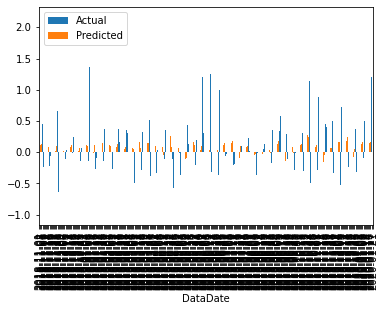

In [55]:
# # df = pd.DataFrame([[5.1, 3.5, 0], [4.9, 3.0, 0], [7.0, 3.2, 1],
# #                    [6.4, 3.2, 1], [5.9, 3.0, 2]],
# #                   columns=['length', 'width', 'species'])
# # ax1 = tsla_p.plot.scatter(x='length',
# #                       y='width',
# #                       c='DarkBlue')

# tsla_p.plot(x="DataDate", y=["Actual", "Predicted"], kind="bar")


In [7]:
signals = tsla_s

,Date,Actual,Predicted,Positive Actual signal,Negative Actual signal,Positive Predicted signal,Negative Predicted signal,Actual Signal,LSTM Predicted Signal
0,2018-11-01,0.022489,-0.001422,1,0,0,-1,1,-1
1,2018-11-02,0.015558,-0.001790,1,0,0,-1,1,-1
2,2018-11-05,0.012907,0.000690,1,0,1,0,1,1
3,2018-11-07,0.016846,0.003306,1,0,1,0,1,1
4,2018-11-08,-0.002371,0.004896,0,-1,1,0,-1,1
...,...,...,...,...,...,...,...,...,...
286,2020-01-14,-0.012898,-0.000388,0,-1,0,-1,-1,-1
287,2020-01-15,-0.012039,0.000947,0,-1,1,0,-1,1
288,2020-01-16,0.015913,0.002845,1,0,1,0,1,1
289,2020-01-17,0.024854,0.004177,1,0,1,0,1,1


In [14]:
big_df

,optionkey,Symbol,ExpirationDate,AskPrice,AskSize,BidPrice,BidSize,LastPrice,PutCall,StrikePrice,Volume,openinterest,UnderlyingPrice,DataDate,time delta
DataDate,,,,,,,,,,,,,,,
2016-01-04,AAPL2016-01-15p94.002016-01-04,AAPL,2016-01-15,0.24,237,0.21,363,0.32,put,94.0,397,356,105.34,2016-01-04,11 days
2016-01-04,TSLA2016-01-22c160.002016-01-04,TSLA,2016-01-22,65.40,6,61.80,7,0.00,call,160.0,0,0,223.42,2016-01-04,18 days
2016-01-04,TSLA2016-01-22p160.002016-01-04,TSLA,2016-01-22,0.34,5,0.09,6,0.09,put,160.0,0,4,223.42,2016-01-04,18 days
2016-01-04,TSLA2016-01-22c165.002016-01-04,TSLA,2016-01-22,60.35,10,56.95,10,0.00,call,165.0,0,0,223.42,2016-01-04,18 days
2016-01-04,TSLA2016-01-22p165.002016-01-04,TSLA,2016-01-22,0.38,102,0.13,96,0.26,put,165.0,0,6,223.42,2016-01-04,18 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-31,TSLA2020-10-16P640.002020-01-31,TSLA,2020-10-16,102.25,1,99.10,12,105.50,put,640.0,1,5,650.57,2020-01-31,259 days
2020-01-31,TSLA2020-10-16P645.002020-01-31,TSLA,2020-10-16,105.20,4,102.30,12,107.00,put,645.0,1,3,650.57,2020-01-31,259 days
2020-01-31,TSLA2020-10-16P650.002020-01-31,TSLA,2020-10-16,107.70,1,104.45,11,107.80,put,650.0,8,9,650.57,2020-01-31,259 days


In [35]:
def percentage_change(col1,col2):
    return ((col2 - col1) / col1) * 100

def conditions(col1, col2):
    value == (col1 > 0) and (col2 > 0)
    return value
    
tsla_p['error'] =  percentage_change(tsla_p['Actual'], tsla_p['Predicted'])
tsla_p['direction'] = conditions(tsla_p['Actual'], tsla_p['Predicted'])
tsla_p

NameError: name 'value' is not defined

In [33]:
tsla_p

,Date,Actual,Predicted,error
0,2018-11-01,0.022489,-0.001422,-106.324160
1,2018-11-02,0.015558,-0.001790,-111.504257
2,2018-11-05,0.012907,0.000690,-94.654503
3,2018-11-07,0.016846,0.003306,-80.374636
4,2018-11-08,-0.002371,0.004896,-306.531151
...,...,...,...,...
286,2020-01-14,-0.012898,-0.000388,-96.991273
287,2020-01-15,-0.012039,0.000947,-107.866578
288,2020-01-16,0.015913,0.002845,-82.119015
289,2020-01-17,0.024854,0.004177,-83.195792


In [28]:
####Functionize this
def join_signals(df, signal):
    signal = tsla_s[['DataDate', 'Actual', 'Predicted', 'LSTM Predicted Signal']].copy()
    signal = signal.set_index(pd.to_datetime(signal.DataDate, infer_datetime_format=True))
    tsla = df.merge(signal, left_index = True, right_index = True, how= 'inner')
    return tsla

,DataDate,Actual,Predicted,LSTM Predicted Signal
DataDate,,,,
2018-11-01,2018-11-01,-0.229124,0.055386,1
2018-11-02,2018-11-02,0.193304,0.109960,1
2018-11-05,2018-11-05,0.218184,0.128825,1
2018-11-07,2018-11-07,0.458844,0.109877,1
2018-11-08,2018-11-08,-0.242285,0.044337,1
...,...,...,...,...
2020-01-14,2020-01-14,-0.027754,0.102245,1
2020-01-15,2020-01-15,-0.177645,0.151677,1
2020-01-16,2020-01-16,0.046394,0.163352,1


In [29]:
tsla = df.merge(signal, left_index = True, right_index = True, how= 'inner')

In [15]:
tsla = select_df(big_df, 'TSLA', 'put')

In [17]:
df =tsla

In [30]:
tsla

,optionkey,Symbol,ExpirationDate,AskPrice,AskSize,BidPrice,BidSize,LastPrice,PutCall,StrikePrice,Volume,openinterest,UnderlyingPrice,DataDate_x,time delta,DataDate_y,Actual,Predicted,LSTM Predicted Signal
DataDate,,,,,,,,,,,,,,,,,,,
2018-11-01,TSLA2019-03-15p195.002018-11-01,TSLA,2019-03-15,8.15,7,7.85,12,5.03,put,195.0,0,99,344.18,2018-11-01,134 days,2018-11-01,-0.229124,0.055386,1
2018-11-01,TSLA2019-03-15p190.002018-11-01,TSLA,2019-03-15,7.70,8,7.35,12,7.90,put,190.0,1,877,344.18,2018-11-01,134 days,2018-11-01,-0.229124,0.055386,1
2018-11-01,TSLA2019-03-15p185.002018-11-01,TSLA,2019-03-15,7.25,8,6.90,12,4.24,put,185.0,0,919,344.18,2018-11-01,134 days,2018-11-01,-0.229124,0.055386,1
2018-11-01,TSLA2019-03-15p180.002018-11-01,TSLA,2019-03-15,6.80,8,6.45,12,6.90,put,180.0,50,581,344.18,2018-11-01,134 days,2018-11-01,-0.229124,0.055386,1
2018-11-01,TSLA2019-03-15p175.002018-11-01,TSLA,2019-03-15,6.40,9,6.00,12,3.50,put,175.0,0,607,344.18,2018-11-01,134 days,2018-11-01,-0.229124,0.055386,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-21,TSLA2020-09-18P10.002020-01-21,TSLA,2020-09-18,0.05,5,0.00,0,0.04,put,10.0,0,1259,547.20,2020-01-21,241 days,2020-01-21,0.075928,0.007508,1
2020-01-21,TSLA2020-09-18P120.002020-01-21,TSLA,2020-09-18,1.17,9,0.64,3,1.04,put,120.0,0,142,547.20,2020-01-21,241 days,2020-01-21,0.075928,0.007508,1
2020-01-21,TSLA2020-09-18P125.002020-01-21,TSLA,2020-09-18,1.25,55,0.71,5,1.07,put,125.0,0,63,547.20,2020-01-21,241 days,2020-01-21,0.075928,0.007508,1


In [43]:
mf = select_df(big_df, 'TSLA', 'put')
mf['% out'] = mf['StrikePrice'] / mf['UnderlyingPrice'] - 1
mf['exp?'] = mf['ExpirationDate'] == mf['DataDate']


In [48]:
tf = map_exp(mf)
tf

,optionkey,Symbol,ExpirationDate,AskPrice,AskSize,BidPrice,BidSize,LastPrice,PutCall,StrikePrice,Volume,openinterest,UnderlyingPrice,DataDate,time delta,% out,exp?,xp
DataDate,,,,,,,,,,,,,,,,,,
2016-01-04,TSLA2016-01-22p160.002016-01-04,TSLA,2016-01-22,0.34,5,0.09,6,0.09,put,160.0,0,4,223.42,2016-01-04,18 days,-0.283860,False,NaN
2016-01-04,TSLA2016-01-22p165.002016-01-04,TSLA,2016-01-22,0.38,102,0.13,96,0.26,put,165.0,0,6,223.42,2016-01-04,18 days,-0.261481,False,NaN
2016-01-04,TSLA2016-01-22p170.002016-01-04,TSLA,2016-01-22,0.45,94,0.18,103,0.31,put,170.0,1,37,223.42,2016-01-04,18 days,-0.239101,False,NaN
2016-01-04,TSLA2016-01-22p175.002016-01-04,TSLA,2016-01-22,0.37,27,0.27,23,0.40,put,175.0,20,12,223.42,2016-01-04,18 days,-0.216722,False,NaN
2016-01-04,TSLA2016-01-22p180.002016-01-04,TSLA,2016-01-22,0.51,51,0.35,127,0.45,put,180.0,14,67,223.42,2016-01-04,18 days,-0.194342,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-31,TSLA2020-10-16P635.002020-01-31,TSLA,2020-10-16,99.60,13,97.05,12,100.00,put,635.0,0,20,650.57,2020-01-31,259 days,-0.023933,False,NaN
2020-01-31,TSLA2020-10-16P640.002020-01-31,TSLA,2020-10-16,102.25,1,99.10,12,105.50,put,640.0,1,5,650.57,2020-01-31,259 days,-0.016247,False,NaN
2020-01-31,TSLA2020-10-16P645.002020-01-31,TSLA,2020-10-16,105.20,4,102.30,12,107.00,put,645.0,1,3,650.57,2020-01-31,259 days,-0.008562,False,NaN


In [53]:
tf['% out'] = tf['% out'].apply(pd.to_numeric)
tf.loc[(tf['% out'] < 0) & (tf['% out'] > -.05)]

,optionkey,Symbol,ExpirationDate,AskPrice,AskSize,BidPrice,BidSize,LastPrice,PutCall,StrikePrice,Volume,openinterest,UnderlyingPrice,DataDate,time delta,% out,exp?,xp
DataDate,,,,,,,,,,,,,,,,,,
2016-01-04,TSLA2016-01-22p212.502016-01-04,TSLA,2016-01-22,4.25,60,3.85,134,4.18,put,212.5,25,24,223.42,2016-01-04,18 days,-0.048877,False,NaN
2016-01-04,TSLA2016-01-22p215.002016-01-04,TSLA,2016-01-22,5.05,69,4.55,165,4.92,put,215.0,112,98,223.42,2016-01-04,18 days,-0.037687,False,NaN
2016-01-04,TSLA2016-01-22p217.502016-01-04,TSLA,2016-01-22,6.10,75,5.35,58,6.53,put,217.5,12,80,223.42,2016-01-04,18 days,-0.026497,False,NaN
2016-01-04,TSLA2016-01-22p220.002016-01-04,TSLA,2016-01-22,6.85,33,6.35,8,7.35,put,220.0,80,108,223.42,2016-01-04,18 days,-0.015307,False,NaN
2016-01-04,TSLA2016-01-22p222.502016-01-04,TSLA,2016-01-22,8.00,28,7.50,33,7.90,put,222.5,41,57,223.42,2016-01-04,18 days,-0.004118,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-31,TSLA2020-10-16P630.002020-01-31,TSLA,2020-10-16,97.00,13,94.50,22,0.00,put,630.0,0,0,650.57,2020-01-31,259 days,-0.031618,False,NaN
2020-01-31,TSLA2020-10-16P635.002020-01-31,TSLA,2020-10-16,99.60,13,97.05,12,100.00,put,635.0,0,20,650.57,2020-01-31,259 days,-0.023933,False,NaN
2020-01-31,TSLA2020-10-16P640.002020-01-31,TSLA,2020-10-16,102.25,1,99.10,12,105.50,put,640.0,1,5,650.57,2020-01-31,259 days,-0.016247,False,NaN


In [61]:
##### Work here

#atm = at the money
#ctm = close to the money
#otm = out of the money
#xf = expire far
#xm = expiring medium's distance
#xs = expiring soon
tf['atm_xf'] = tf['time delta'] < np.timedelta64(14, 'D') #& (tf['% out'] > -.1) & (tf['% out'] < 0))
# tf['ctm_xf'] = ((tf['time delta' np.timedelta64(14, 'D')) & (tf['% out'] > -.1) & (tf['% out'] < 0))])) 
# tf['otm_xf'] = ((tf['time delta' np.timedelta64(14, 'D')) & (tf['% out'] > -.1) & (tf['% out'] < 0))])) 
# tf['atm_xm'] = ((tf['time delta' np.timedelta64(14, 'D')) & (tf['% out'] > -.1) & (tf['% out'] < 0))])) 
# tf['ctm_xm'] = ((tf['time delta' np.timedelta64(14, 'D')) & (tf['% out'] > -.1) & (tf['% out'] < 0))])) 
# tf['otm_xm'] = ((tf['time delta' np.timedelta64(14, 'D')) & (tf['% out'] > -.1) & (tf['% out'] < 0))])) 
# tf['atm_xs'] = ((tf['time delta' np.timedelta64(14, 'D')) & (tf['% out'] > -.1) & (tf['% out'] < 0))])) ]
# tf['ctm_xs'] = ((tf['time delta' np.timedelta64(14, 'D')) & (tf['% out'] > -.1) & (tf['% out'] < 0))])) 
# tf['otm_xs'] = ((tf['time delta' np.timedelta64(14, 'D')) & (tf['% out'] > -.1) & (tf['% out'] < 0))])) 


TypeError: '>' not supported between instances of 'numpy.ndarray' and 'str'

In [ ]:
def